# スタックとキュー

スタックとキューは python の場合，`List` もしくは `collections.deque` で実現できるので，とりあえずそっちを使ってみます．

In [1]:
from collections import deque
import timeit


In [2]:
def push(stack, x):
    stack.append(x)
    
def pop(stack):
    return stack.pop()

def push_trial(size, stack):
    for i in range(10**size): # サイズは10のべきで測る
        push(stack, i)
        
def pop_trial(size, stack):
    for i in range(10**size):
        pop(stack)
    


# list と deque で時間計測
stack_with_list = []
stack_with_deque = deque([])
    
time_push_list = timeit.timeit(lambda: push_trial(5, stack_with_list), number=100)
time_push_deque = timeit.timeit(lambda: push_trial(5, stack_with_deque), number=100)
time_pop_list = timeit.timeit(lambda: pop_trial(5, stack_with_list), number=100)
time_pop_deque = timeit.timeit(lambda: pop_trial(5, stack_with_deque), number=100)
print(time_push_list, time_push_deque)

0.7928791669983184 0.7716652499948395


In [3]:
# じゃあ，あとはデータとって時間計測の結果をグラフにしてみる

import pandas as pd

data_list = []
for size in range(1, 7):
    time_push_list = timeit.timeit(lambda: push_trial(size, stack_with_list), number=10)
    time_push_deque = timeit.timeit(lambda: push_trial(size, stack_with_deque), number=10)
    time_pop_list = timeit.timeit(lambda: pop_trial(size, stack_with_list), number=10)
    time_pop_deque = timeit.timeit(lambda: pop_trial(size, stack_with_deque), number=10)
    data_list.append({'size': size, 
               'push_list': time_push_list, 
               'pop_list': time_pop_list, 
               'push_deque': time_push_deque, 
               'pop_deque': time_pop_deque})

df = pd.DataFrame(data_list)

df.head()


,size,push_list,pop_list,push_deque,pop_deque
0,1,0.000020,0.000012,0.000013,0.000011
1,2,0.000077,0.000071,0.000075,0.000070
2,3,0.000768,0.000729,0.000770,0.000734
3,4,0.007806,0.007470,0.007853,0.007621
4,5,0.077089,0.074421,0.075060,0.075108


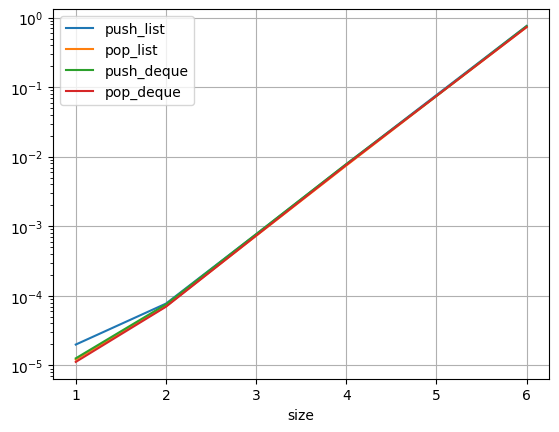

In [8]:
import matplotlib.pylab as plt

df.plot(x='size', y=['push_list', 'pop_list', 'push_deque', 'pop_deque'], logy=True)
plt.grid()